# PART 1 EDA

Initial analysis of the data

In [287]:
import pandas as pd

In [288]:
df = pd.read_csv("glass_data.csv")
df.head()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [289]:
# Drop first column of dataframe
df = df.iloc[: , 1:]
df

,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [290]:
cols=["r_index","na","mg","al","si","k","ca","ba","fe","glass_type"]

labels=["building_windows_float_processed",
        "building_windows_non_float_processed",
      "vehicle_windows_float_processed",
      "vehicle_windows_non_float_processed",
      "containers",
      "tableware",
      "headlamps"
]
cols, labels

(['r_index', 'na', 'mg', 'al', 'si', 'k', 'ca', 'ba', 'fe', 'glass_type'],
 ['building_windows_float_processed',
  'building_windows_non_float_processed',
  'vehicle_windows_float_processed',
  'vehicle_windows_non_float_processed',
  'containers',
  'tableware',
  'headlamps'])

In [291]:
df.columns=cols
df.head()

,r_index,na,mg,al,si,k,ca,ba,fe,glass_type
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [292]:
#remove category with no data

In [293]:
4 in df.glass_type.values

False

In [294]:
df["glass_type"].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: glass_type, dtype: int64

In [295]:
del labels[3]
labels

['building_windows_float_processed',
 'building_windows_non_float_processed',
 'vehicle_windows_float_processed',
 'containers',
 'tableware',
 'headlamps']

In [296]:
#reorganize ylabels to run from 0

In [297]:
df.loc[df.glass_type <4, "glass_type"]-=1
df.loc[df.glass_type >4, "glass_type"]-=2
df["glass_type"].value_counts()

1    76
0    69
5    29
2    17
3    13
4     9
Name: glass_type, dtype: int64

In [298]:
df.describe()

,r_index,na,mg,al,si,k,ca,ba,fe,glass_type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,1.549296
std,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,1.708376
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,0.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,1.000000
75%,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,2.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,5.000000


In [299]:
import matplotlib.pyplot as plt
import seaborn as sns

In [300]:
#distribution of features

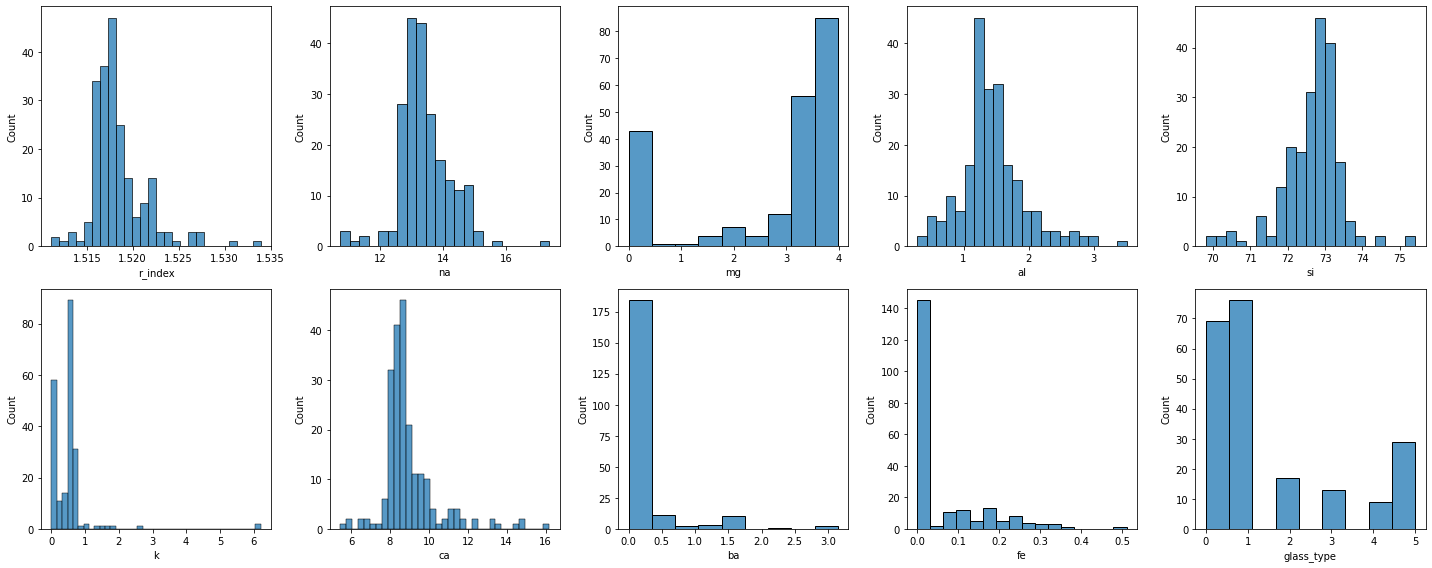

In [301]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,8))
for i, column in enumerate(df.columns, 1):
    plt.subplot(2,5,i)
    sns.histplot(df[column],)
    
fig.tight_layout()

In [302]:
#outliers present in the data

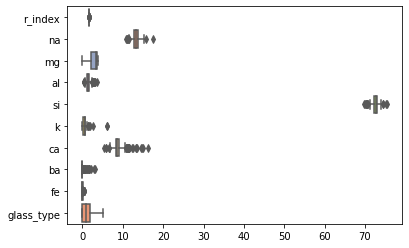

In [303]:
ax = sns.boxplot(data=df, orient="h", palette="Set2")

Text(0.5, 0, 'k')

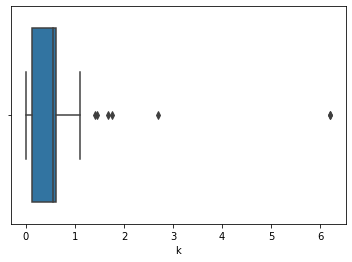

In [304]:
ax = sns.boxplot(x=df["k"])
ax.set_xlabel('k')

In [305]:
df[df.k>=2]

,r_index,na,mg,al,si,k,ca,ba,fe,glass_type
170,1.51316,13.02,0.0,3.04,70.48,6.21,6.96,0.0,0.0,3
171,1.51321,13.00,0.0,3.02,70.70,6.21,6.93,0.0,0.0,3
200,1.51653,11.95,0.0,1.19,75.18,2.70,8.93,0.0,0.0,5


In [306]:
df.glass_type.value_counts()

1    76
0    69
5    29
2    17
3    13
4     9
Name: glass_type, dtype: int64

In [307]:
#removal of outliers

In [308]:
df=df[df.k<2].reset_index(drop=True)
df

,r_index,na,mg,al,si,k,ca,ba,fe,glass_type
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,0
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,0
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,0
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,0
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,0
...,...,...,...,...,...,...,...,...,...,...
205,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,5
206,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,5
207,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,5
208,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,5


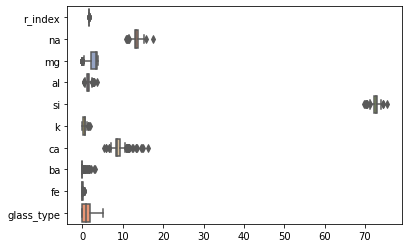

In [309]:
ax = sns.boxplot(data=df, orient="h", palette="Set2")

In [310]:
#no missing values

In [311]:
df.isnull().any()

r_index       False
na            False
mg            False
al            False
si            False
k             False
ca            False
ba            False
fe            False
glass_type    False
dtype: bool

In [312]:
df_copy=df
one_hot_df=pd.get_dummies(df_copy['glass_type'])
df_copy.drop('glass_type', axis=1)
one_hot_df=df_copy.join(one_hot_df)
one_hot_df.tail()

,r_index,na,mg,al,si,k,ca,ba,fe,glass_type,0,1,2,3,4,5
205,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,5,0,0,0,0,0,1
206,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,5,0,0,0,0,0,1
207,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,5,0,0,0,0,0,1
208,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,5,0,0,0,0,0,1
209,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,5,0,0,0,0,0,1


In [313]:
#correlation matrix shows high correlation of features

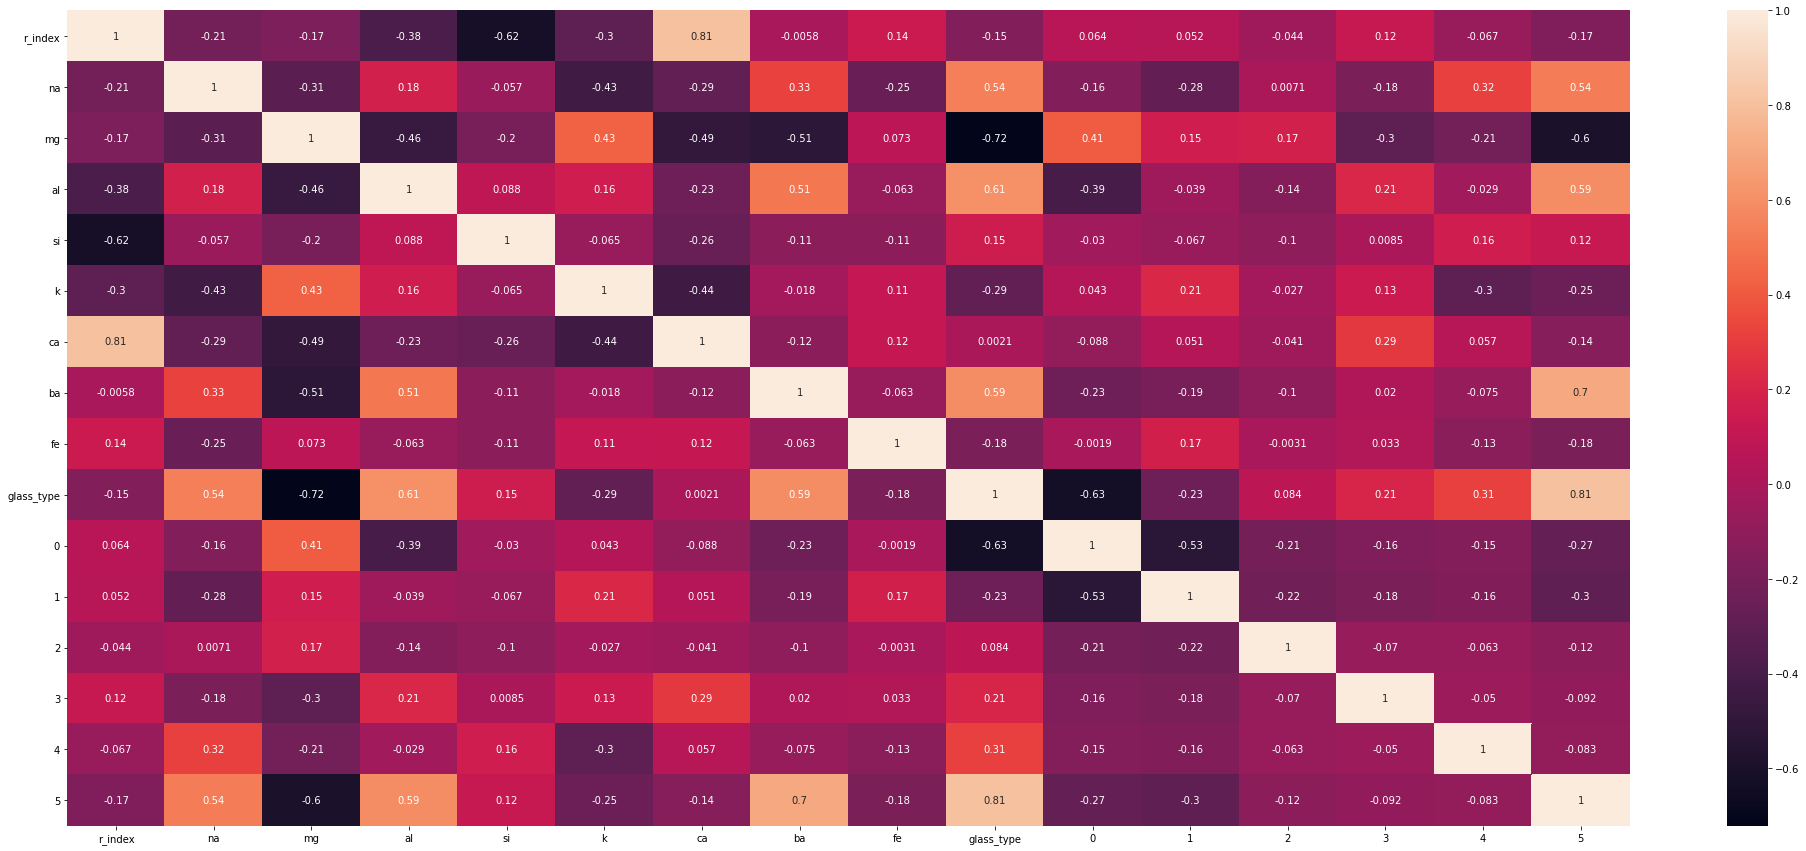

In [314]:
corrMatrix = one_hot_df.corr()
plt.figure(figsize = (35,15))
sns.heatmap(corrMatrix, annot=True)
plt.show()

## Conclusion Part 1
Discussion of findings and relevance on planned classification algorithms
1. category 4 "vehicle_windows_nonfloat_processed" was removed from the label due to no data and the label was duly adjusted to run from 0-6 this will help in dependent variable encoding and improve model accuracy


2. visualization shows distribution of features is normal or skewed so standardization will work better here than normalization both methods were tested and that turned out to be the case


3. boxplot visualization shows outliers on "k" feature on categories that have relatively abundant data, given the overall small size of the dataset these can have a disproportionate effect on the ML model so outliers were removed, experiments were done and this turned out to be the case


4. correlation matrix shows that features are highly correlated, this means that decision tree algorithms and neural networks will have better results here due to their dependency and ability to extract information from sorrounding features, consequently linear algorithms such as discriminant analysis and logistic regression will not produce good result here due to multicollinearity in the data so these were avoided

# PART 2 DATA PREPARATION
Preparation of Data necessary for machine learning

In [315]:
import numpy as np

In [316]:
#shuffle data

In [317]:
df=df.sample(frac=1).reset_index(drop=True)
df

,r_index,na,mg,al,si,k,ca,ba,fe,glass_type
0,1.51674,12.79,3.52,1.54,73.36,0.66,7.90,0.0,0.00,1
1,1.51655,13.41,3.39,1.28,72.64,0.52,8.65,0.0,0.00,2
2,1.51590,13.02,3.58,1.51,73.12,0.69,7.96,0.0,0.00,1
3,1.51860,13.36,3.43,1.43,72.26,0.51,8.60,0.0,0.00,1
4,1.51806,13.00,3.80,1.08,73.07,0.56,8.38,0.0,0.12,1
...,...,...,...,...,...,...,...,...,...,...
205,1.51796,13.50,3.36,1.63,71.94,0.57,8.81,0.0,0.09,2
206,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,0
207,1.52177,13.75,1.01,1.36,72.19,0.33,11.14,0.0,0.00,1
208,1.52152,13.05,3.65,0.87,72.22,0.19,9.85,0.0,0.17,0


In [318]:
df.glass_type.value_counts()

1    76
0    69
5    28
2    17
3    11
4     9
Name: glass_type, dtype: int64

In [319]:
#seperate into features and labels

In [320]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X.shape, y

((210, 9),
 array([1, 2, 1, 1, 1, 2, 0, 1, 0, 3, 1, 0, 0, 0, 0, 1, 1, 1, 1, 5, 0, 0,
        0, 3, 1, 0, 0, 1, 1, 1, 5, 0, 1, 5, 1, 5, 2, 1, 1, 0, 1, 3, 0, 1,
        5, 0, 1, 0, 5, 5, 1, 2, 1, 0, 1, 1, 0, 1, 1, 1, 0, 3, 4, 0, 0, 1,
        0, 5, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 2, 0, 2, 5, 1, 0, 1, 0, 4, 1,
        1, 1, 5, 1, 0, 0, 0, 0, 3, 5, 1, 1, 0, 0, 1, 4, 5, 1, 5, 1, 1, 0,
        4, 2, 4, 2, 2, 1, 3, 0, 0, 0, 5, 0, 5, 1, 4, 1, 0, 0, 2, 2, 1, 5,
        2, 1, 0, 1, 5, 5, 1, 1, 2, 4, 1, 0, 3, 0, 0, 0, 5, 3, 1, 0, 5, 0,
        5, 1, 0, 1, 0, 1, 1, 3, 1, 0, 3, 0, 2, 0, 1, 0, 1, 3, 5, 0, 0, 0,
        0, 1, 1, 1, 1, 0, 0, 1, 1, 4, 5, 5, 1, 0, 5, 2, 4, 1, 1, 1, 5, 2,
        0, 0, 5, 1, 0, 1, 1, 2, 0, 1, 0, 5], dtype=int64))

In [321]:
#stratified split to prevent test set imbalances

In [322]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify=y)

In [323]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((168, 9), (42, 9), (168,), (42,))

In [324]:
#standardize the training data

In [325]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#sc = MinMaxScaler()
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Conclusion Part 2
Explanation of rationale behind data preparation and how it will assist in machine learning
1. The data was shuffled to prevent the model from learning unuseful patterns and improve model predictive performance


2. due to the overall small size of the dataset and especially the category 4 "containers" only having 9 records Train, test split was done with stratification to prevent imbalances in the test set and improve accuracy


3. varied ranges of input data can reduce model performance so Standardization was done on the training and test data to improve model performance and prediction accuracy, standardization was chosen here as opposed to normalization due to the generally normal distribution of the data and better performance


# PART 3 CLASSIFICATION ALGORITHMS
Implementing classification algorithms

In [326]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [327]:
results = []
names = []
kfold = StratifiedKFold(n_splits=3, random_state=1, shuffle=True)
models=[]
models.append(
    ()
)

In [328]:
#kneighbours

In [329]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
results.append( cross_val_score(classifier, X_scaled, y, cv=kfold, scoring='accuracy'))
names.append('KNN')
results, names
#classifier.fit(X_train, y_train)

([array([0.34285714, 0.31428571, 0.28571429])], ['KNN'])

In [330]:
#support vector classifier

In [331]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
results.append( cross_val_score(classifier, X_train, y_train, cv=kfold, scoring='accuracy'))
names.append('SVM')
results, names

([array([0.34285714, 0.31428571, 0.28571429]),
  array([0.67857143, 0.55357143, 0.64285714])],
 ['KNN', 'SVM'])

In [332]:
#naive bayes

In [333]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
results.append( cross_val_score(classifier, X_train, y_train, cv=kfold, scoring='accuracy'))
names.append('NB')
results, names

([array([0.34285714, 0.31428571, 0.28571429]),
  array([0.67857143, 0.55357143, 0.64285714]),
  array([0.32142857, 0.58928571, 0.55357143])],
 ['KNN', 'SVM', 'NB'])

In [334]:
#decision tree classifier

In [335]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
results.append( cross_val_score(classifier, X_train, y_train, cv=kfold, scoring='accuracy'))
names.append('CART')
results, names

([array([0.34285714, 0.31428571, 0.28571429]),
  array([0.67857143, 0.55357143, 0.64285714]),
  array([0.32142857, 0.58928571, 0.55357143]),
  array([0.58928571, 0.73214286, 0.66071429])],
 ['KNN', 'SVM', 'NB', 'CART'])

In [336]:
# random forest classifier had best results

In [337]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 0)
results.append( cross_val_score(classifier, X_train, y_train, cv=kfold, scoring='accuracy'))
names.append('RF')
results, names

([array([0.34285714, 0.31428571, 0.28571429]),
  array([0.67857143, 0.55357143, 0.64285714]),
  array([0.32142857, 0.58928571, 0.55357143]),
  array([0.58928571, 0.73214286, 0.66071429]),
  array([0.71428571, 0.69642857, 0.75      ])],
 ['KNN', 'SVM', 'NB', 'CART', 'RF'])

In [338]:
# artificial neural network tracks well with stable learning, more data will improve the model here

In [339]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [340]:
import tensorflow as tf

In [341]:
#create the neural network

In [342]:
# Set random seed
tf.random.set_seed(42)

# Create the model
glass_model = tf.keras.Sequential([
  tf.keras.layers.Dense(8, activation="relu"),
  tf.keras.layers.Dense(6, activation="softmax") 
])

# Compile the model
glass_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

In [343]:
#create one hot categorical encoding for output variables 0-6

In [344]:
y_train.shape, X_train.shape


((168,), (168, 9))

In [345]:
from tensorflow.keras.utils import to_categorical
one_hot_y_train= to_categorical(y_train, num_classes=6)
one_hot_y_test = to_categorical(y_test, num_classes=6)
one_hot_y_train.shape, one_hot_y_test.shape

((168, 6), (42, 6))

In [346]:
one_hot_y_train[0]

array([0., 1., 0., 0., 0., 0.], dtype=float32)

In [347]:
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for x epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", # watch the val loss metric
                                                  patience=10) # if val loss decreases for 10 epochs in a row, stop training

In [348]:

# Fit the model
history = glass_model.fit(X_train,
                                one_hot_y_train,
                                epochs=200,
                                validation_data=(X_test, one_hot_y_test),
                               callbacks=[early_stopping]
                               ) 

Epoch 1/200
6/6 [==============================] - 1s 49ms/step - loss: 2.0072 - accuracy: 0.1429 - val_loss: 2.0839 - val_accuracy: 0.1905
Epoch 2/200
6/6 [==============================] - 0s 17ms/step - loss: 1.9704 - accuracy: 0.1667 - val_loss: 2.0509 - val_accuracy: 0.1905
Epoch 3/200
6/6 [==============================] - 0s 10ms/step - loss: 1.9347 - accuracy: 0.1964 - val_loss: 2.0200 - val_accuracy: 0.1905
Epoch 4/200
6/6 [==============================] - 0s 36ms/step - loss: 1.9020 - accuracy: 0.2202 - val_loss: 1.9907 - val_accuracy: 0.2143
Epoch 5/200
6/6 [==============================] - 0s 37ms/step - loss: 1.8697 - accuracy: 0.2857 - val_loss: 1.9633 - val_accuracy: 0.2619
Epoch 6/200
6/6 [==============================] - 0s 30ms/step - loss: 1.8402 - accuracy: 0.3155 - val_loss: 1.9363 - val_accuracy: 0.3333
Epoch 7/200
6/6 [==============================] - 0s 25ms/step - loss: 1.8109 - accuracy: 0.3512 - val_loss: 1.9105 - val_accuracy: 0.3810
Epoch 8/200
6/6 [===

6/6 [==============================] - 0s 8ms/step - loss: 1.1221 - accuracy: 0.4821 - val_loss: 1.3158 - val_accuracy: 0.4762
Epoch 60/200
6/6 [==============================] - 0s 9ms/step - loss: 1.1159 - accuracy: 0.4821 - val_loss: 1.3091 - val_accuracy: 0.4762
Epoch 61/200
6/6 [==============================] - 0s 9ms/step - loss: 1.1101 - accuracy: 0.4821 - val_loss: 1.3024 - val_accuracy: 0.4762
Epoch 62/200
6/6 [==============================] - 0s 12ms/step - loss: 1.1042 - accuracy: 0.4762 - val_loss: 1.2965 - val_accuracy: 0.4762
Epoch 63/200
6/6 [==============================] - 0s 8ms/step - loss: 1.0988 - accuracy: 0.4821 - val_loss: 1.2905 - val_accuracy: 0.4762
Epoch 64/200
6/6 [==============================] - 0s 8ms/step - loss: 1.0934 - accuracy: 0.4821 - val_loss: 1.2843 - val_accuracy: 0.4762
Epoch 65/200
6/6 [==============================] - 0s 8ms/step - loss: 1.0880 - accuracy: 0.4821 - val_loss: 1.2785 - val_accuracy: 0.5000
Epoch 66/200
6/6 [==============

6/6 [==============================] - 0s 9ms/step - loss: 0.8632 - accuracy: 0.6667 - val_loss: 1.0660 - val_accuracy: 0.6429
Epoch 118/200
6/6 [==============================] - 0s 15ms/step - loss: 0.8601 - accuracy: 0.6726 - val_loss: 1.0635 - val_accuracy: 0.6429
Epoch 119/200
6/6 [==============================] - 0s 11ms/step - loss: 0.8568 - accuracy: 0.6726 - val_loss: 1.0622 - val_accuracy: 0.6429
Epoch 120/200
6/6 [==============================] - 0s 20ms/step - loss: 0.8538 - accuracy: 0.6726 - val_loss: 1.0616 - val_accuracy: 0.6429
Epoch 121/200
6/6 [==============================] - 0s 9ms/step - loss: 0.8506 - accuracy: 0.6726 - val_loss: 1.0610 - val_accuracy: 0.6429
Epoch 122/200
6/6 [==============================] - 0s 10ms/step - loss: 0.8476 - accuracy: 0.6726 - val_loss: 1.0592 - val_accuracy: 0.6429
Epoch 123/200
6/6 [==============================] - 0s 16ms/step - loss: 0.8446 - accuracy: 0.6786 - val_loss: 1.0580 - val_accuracy: 0.6429
Epoch 124/200
6/6 [===

In [349]:
# Plot the validation and training data loss curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [350]:
# training and validation accuracy and loss curves track well with minimal overfitting, more data will improve the model here

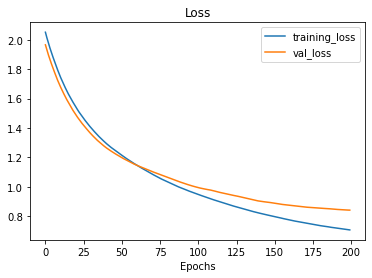

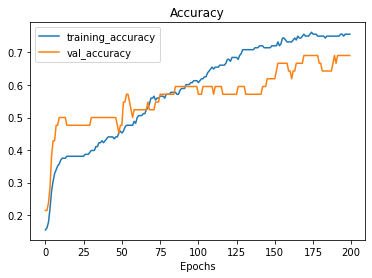

In [351]:
plot_loss_curves(non_norm_history)

## Conclusion Part 3
Discussion of findings and final rational for choosing Random Forest classification algorithm

1. Various machine learning models were used including one Artificial Neural Network 



2. The models were evaluated with stratified 3-fold cross validation to get a balanced sample of test data, 3 folds were chosen due to small dataset size



3. Random Forest Algorithm showed the highest accuracy at 83.9% while others were in the 50-60's in cross validation by a significant margin and was chosen as the candidate

# PART 4 FINAL CLASSIFICATION
Making a classification on the test data, using your hyperparameter optimized Random Forest classification algorithm 

In [352]:
#hyper parameter optimization

In [353]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [354]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 5, stop = 500, num = 20)]
n_estimators=np.arange(5,500,5).tolist()
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = np.arange(10,110,5).tolist()
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [355]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 15, 20, 25, 30, 35,
                                                      40, 45, 50, 55, 60, 65,
                                                      70, 75, 80, 85, 90, 95,
                                                      100, 105, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [5, 10, 15, 20, 25, 30,
                                                         35, 40, 45, 50, 55, 60,
                                                         65, 70, 75, 80, 85, 90,
                                                         95, 100,

In [356]:
#best parameters

In [357]:
bp=rf_random.best_params_
bp

{'n_estimators': 375,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15,
 'bootstrap': True}

In [358]:
#fit the rf model on the best parameters

In [359]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = bp.get('n_estimators'), random_state = 0,
                                    criterion= 'entropy',
                                   min_samples_split=bp.get('min_samples_split'),
                                   min_samples_leaf=bp.get('min_samples_leaf'),
                                   max_features=bp.get('max_features'),
                                   max_depth=bp.get('max_depth'),
                                   bootstrap=bp.get('bootstrap'))
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features='sqrt',
                       n_estimators=375, random_state=0)

In [360]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [361]:
#training accuracy 100%~shows overfitting

In [362]:
training_acc=classifier.predict(X_train)
cm = confusion_matrix(y_train, training_acc)
print(cm)
print("Accuracy train: ", accuracy_score(y_train, training_acc))

[[55  0  0  0  0  0]
 [ 0 61  0  0  0  0]
 [ 0  0 14  0  0  0]
 [ 0  0  0  9  0  0]
 [ 0  0  0  0  7  0]
 [ 0  0  0  0  0 22]]
Accuracy train:  1.0


In [363]:
#test set accuracy

In [364]:
y_pred = classifier.predict(X_test)

In [365]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[13  0  1  0  0  0]
 [ 3 10  1  0  1  0]
 [ 0  0  3  0  0  0]
 [ 0  0  0  1  0  1]
 [ 0  0  0  0  2  0]
 [ 1  0  0  0  0  5]]


0.8095238095238095

In [366]:
# a better confusion matrix will reveal more information here, credits for the function below

In [367]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #rotate diagonally to make labels visible
  ax.set_xticklabels(classes, rotation = 45)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [368]:
labels

['building_windows_float_processed',
 'building_windows_non_float_processed',
 'vehicle_windows_float_processed',
 'containers',
 'tableware',
 'headlamps']

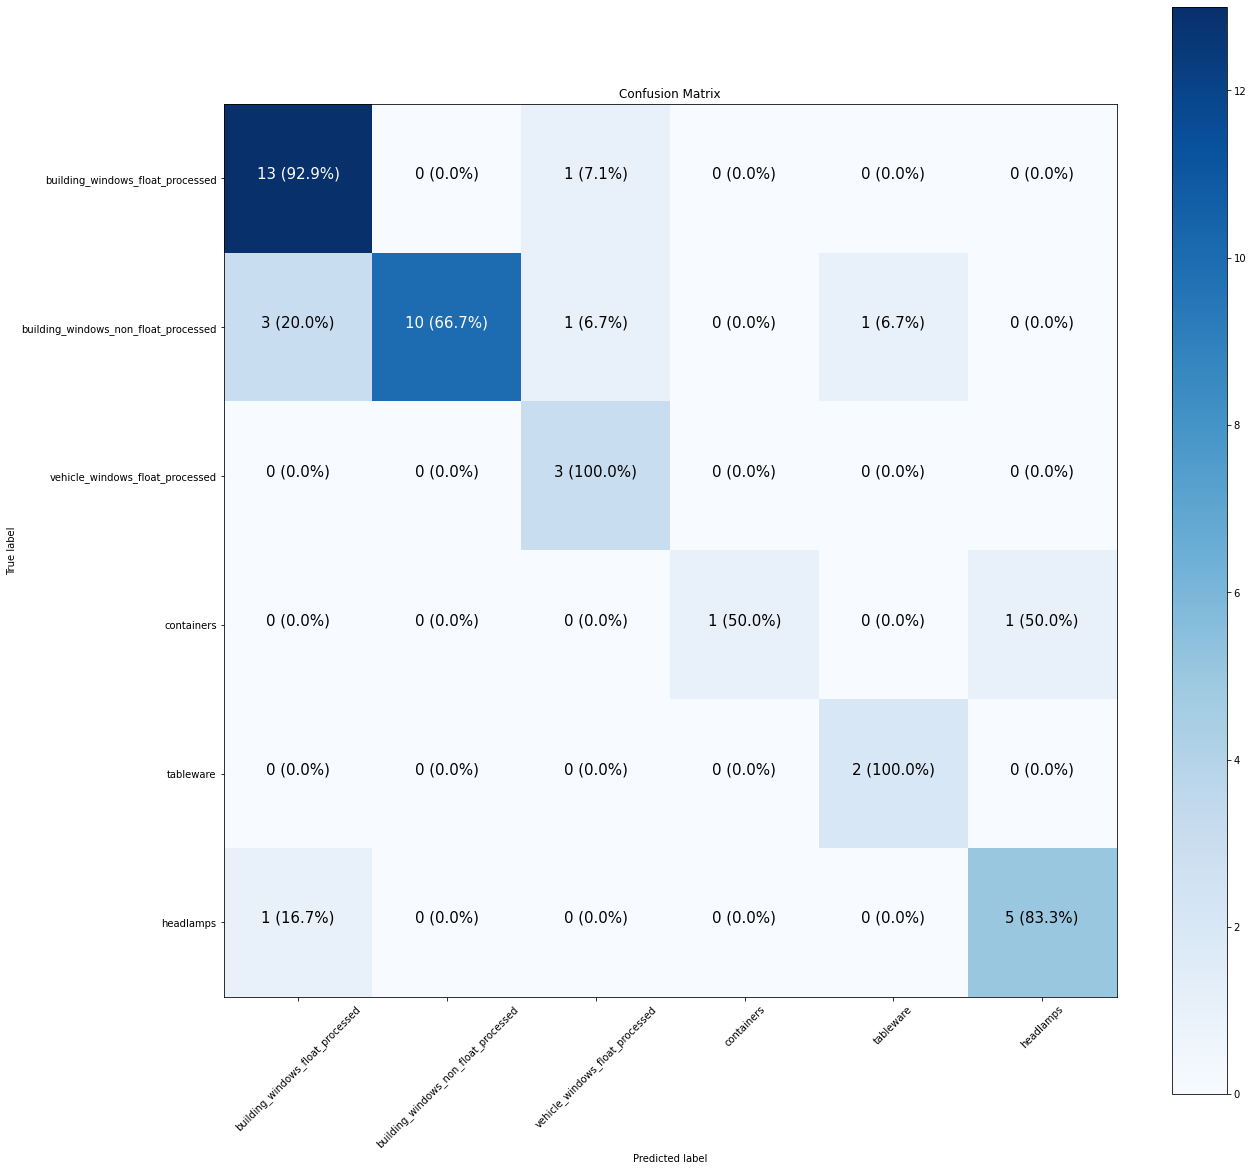

In [369]:
make_confusion_matrix(y_test, y_pred, classes=labels, figsize=(20, 20), text_size=15)

## Conclusion Part 4
comments on the accuracy differential between the training and testing set

1. Hyperparameter optimization was done on the chosen candidate Random Forest Classifier showed marginal improvement 83-85%~ accuracy on the stratified test data


2. the model was able to achieve 100%accuracy on the training data this shows overfitting of the train data possibly due to the overall small size of the dataset and high correlation between the features


3. confusion matrix shows high confusion on the building windows float_processed -> non_float_processed category but otherwise generally good performance, the dataset is highly learnable and more data would likely siginificantly improve predictive accuracy